Imports

In [1]:
import backtrader as bt
from datetime import datetime
import yfinance as yf
import pickle
import matplotlib
from strategies import Keltner, LogReg, DeepQ

Cerebro Instance

In [2]:
cerebro = bt.Cerebro()

Market Data

In [3]:
"GC=F" # Gold
"^GSPC" # S&P500

data = yf.download("GC=F", interval="1m") #must match name of agent

feed = bt.feeds.PandasDirectData(dataname = data)

cerebro.adddata(feed)

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-22 18:00:00-05:00,1928.400024,1929.400024,1926.900024,1928.800049,1928.800049,0
2023-01-22 18:01:00-05:00,1928.599976,1928.599976,1928.000000,1928.000000,1928.000000,115
2023-01-22 18:02:00-05:00,1927.900024,1927.900024,1927.300049,1927.400024,1927.400024,64
2023-01-22 18:03:00-05:00,1927.400024,1927.500000,1925.699951,1925.699951,1925.699951,113
2023-01-22 18:04:00-05:00,1925.699951,1925.900024,1925.300049,1925.599976,1925.599976,143


Portfolio Balance

In [4]:
init_balance = 5102.56

cerebro.broker.setcash(init_balance)

Loading Strategy

In [5]:
cerebro.addstrategy(DeepQ)

sizer = bt.sizers.PercentSizer

cerebro.addsizer(sizer)

Running Strategy

In [6]:
try:
  for i in range(1): # number of episodes
    cerebro.run()
except KeyboardInterrupt:
  pass

Results

Final Portfolio Value: £5282.539398664206
P/L: £179.9793986642053


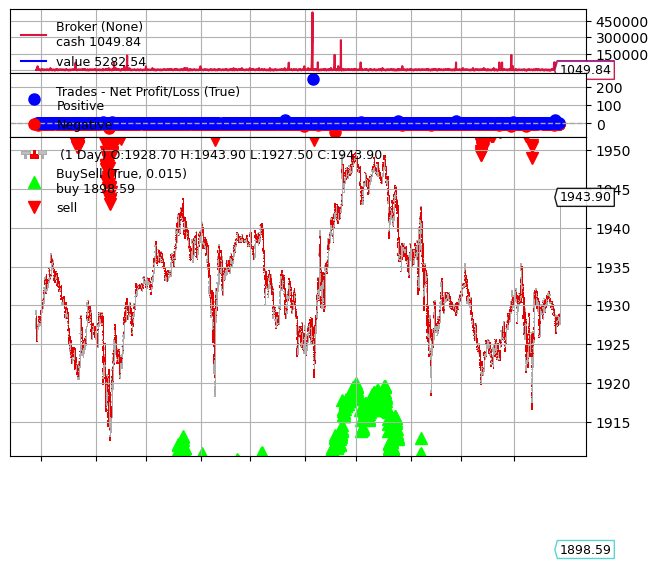

In [9]:
portvalue = cerebro.broker.getvalue()
pnl = portvalue - init_balance

print(f'Final Portfolio Value: £{portvalue}')
print(f'P/L: £{pnl}')

%matplotlib inline

cerebro.plot(iplot=False, style="candlestick", volume = False, filename='plot.png' )

matplotlib.pyplot.show()
